In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [192]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [193]:
df = pd.read_csv('nbastats2022-2023.csv')
df_c = df.copy()

## Data Analysis and Data Cleaning

In [194]:
df = df.iloc[:,1:28] # Using iloc() to filter the columns in the dataframe 
df

,Team,GP,W,L,WIN%,Min,PTS,FGM,FGA,FG%,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
0,Milwaukee Bucks,31,22,9,0.710,48.3,112.9,41.1,89.1,46.2,...,36.6,48.4,24.9,15.2,6.5,5.7,4.6,18.7,19.7,3.9
1,Boston Celtics,32,22,10,0.688,48.6,118.0,41.8,87.6,47.7,...,34.6,43.6,26.3,13.9,6.6,5.3,3.8,19.8,20.5,5.7
2,Cleveland Cavaliers,33,22,11,0.667,48.9,111.0,40.5,84.4,48.0,...,33.5,42.9,23.4,14.6,6.4,4.1,4.4,19.2,21.6,6.5
3,Denver Nuggets,30,19,11,0.633,48.2,115.4,43.4,86.3,50.3,...,33.0,43.4,28.2,15.4,7.1,4.5,4.6,19.3,21.0,1.5
4,Memphis Grizzlies,30,19,11,0.633,48.3,115.4,43.0,92.1,46.7,...,35.9,48.8,25.0,14.6,7.4,5.9,5.0,19.7,21.7,4.1
5,Brooklyn Nets,32,20,12,0.625,48.2,114.0,42.5,83.6,50.8,...,32.5,40.2,26.4,14.8,6.9,6.9,3.7,22.1,18.8,2.5
6,New Orleans Pelicans,30,18,12,0.600,48.8,117.3,43.4,89.4,48.5,...,33.4,44.9,27.0,15.0,8.7,4.3,5.1,20.2,20.5,4.8
7,Philadelphia 76ers,30,18,12,0.600,48.7,111.2,39.5,83.6,47.3,...,32.5,40.7,24.2,14.7,8.7,4.6,4.8,20.5,19.7,3.9
8,Phoenix Suns,32,19,13,0.594,48.3,115.7,43.0,91.4,47.1,...,31.2,43.5,27.0,13.2,7.2,5.3,4.2,21.2,20.2,5.0
9,LA Clippers,33,19,14,0.576,48.2,107.6,39.0,84.8,46.0,...,34.8,44.6,22.6,15.8,6.4,4.7,4.3,20.0,19.8,0.1


In [195]:
df.info() # basic info to know the dtypes 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Team    30 non-null     object 
 1   GP      30 non-null     int64  
 2   W       30 non-null     int64  
 3   L       30 non-null     int64  
 4   WIN%    30 non-null     float64
 5   Min     30 non-null     float64
 6   PTS     30 non-null     float64
 7   FGM     30 non-null     float64
 8   FGA     30 non-null     float64
 9   FG%     30 non-null     float64
 10  3PM     30 non-null     float64
 11  3PA     30 non-null     float64
 12  3P%     30 non-null     float64
 13  FTM     30 non-null     float64
 14  FTA     30 non-null     float64
 15  FT%     30 non-null     float64
 16  OREB    30 non-null     float64
 17  DREB    30 non-null     float64
 18  REB     30 non-null     float64
 19  AST     30 non-null     float64
 20  TOV     30 non-null     float64
 21  STL     30 non-null     float64
 22  BLK 

In [196]:
df.isnull().sum()  # to know if there is null values

Team    0
GP      0
W       0
L       0
WIN%    0
Min     0
PTS     0
FGM     0
FGA     0
FG%     0
3PM     0
3PA     0
3P%     0
FTM     0
FTA     0
FT%     0
OREB    0
DREB    0
REB     0
AST     0
TOV     0
STL     0
BLK     0
BLKA    0
PF      0
PFD     0
+/-     0
dtype: int64

In [197]:
df

,Team,GP,W,L,WIN%,Min,PTS,FGM,FGA,FG%,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
0,Milwaukee Bucks,31,22,9,0.710,48.3,112.9,41.1,89.1,46.2,...,36.6,48.4,24.9,15.2,6.5,5.7,4.6,18.7,19.7,3.9
1,Boston Celtics,32,22,10,0.688,48.6,118.0,41.8,87.6,47.7,...,34.6,43.6,26.3,13.9,6.6,5.3,3.8,19.8,20.5,5.7
2,Cleveland Cavaliers,33,22,11,0.667,48.9,111.0,40.5,84.4,48.0,...,33.5,42.9,23.4,14.6,6.4,4.1,4.4,19.2,21.6,6.5
3,Denver Nuggets,30,19,11,0.633,48.2,115.4,43.4,86.3,50.3,...,33.0,43.4,28.2,15.4,7.1,4.5,4.6,19.3,21.0,1.5
4,Memphis Grizzlies,30,19,11,0.633,48.3,115.4,43.0,92.1,46.7,...,35.9,48.8,25.0,14.6,7.4,5.9,5.0,19.7,21.7,4.1
5,Brooklyn Nets,32,20,12,0.625,48.2,114.0,42.5,83.6,50.8,...,32.5,40.2,26.4,14.8,6.9,6.9,3.7,22.1,18.8,2.5
6,New Orleans Pelicans,30,18,12,0.600,48.8,117.3,43.4,89.4,48.5,...,33.4,44.9,27.0,15.0,8.7,4.3,5.1,20.2,20.5,4.8
7,Philadelphia 76ers,30,18,12,0.600,48.7,111.2,39.5,83.6,47.3,...,32.5,40.7,24.2,14.7,8.7,4.6,4.8,20.5,19.7,3.9
8,Phoenix Suns,32,19,13,0.594,48.3,115.7,43.0,91.4,47.1,...,31.2,43.5,27.0,13.2,7.2,5.3,4.2,21.2,20.2,5.0
9,LA Clippers,33,19,14,0.576,48.2,107.6,39.0,84.8,46.0,...,34.8,44.6,22.6,15.8,6.4,4.7,4.3,20.0,19.8,0.1


In [198]:
f_df= df.drop(['L','Min',"+/-","GP"],axis=1) #removing this since this is irrelevant to the win percentage, we only need the performance stat

In [199]:
statsOnly = f_df.drop(["Team"],axis=1) # removed the team since its a string and may give us problem when analyzing data
statsOnly                              # we put it in another variable so we can still use the f_df and add back the team column later

,W,WIN%,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD
0,22,0.710,112.9,41.1,89.1,46.2,13.2,37.3,35.3,17.5,...,11.7,36.6,48.4,24.9,15.2,6.5,5.7,4.6,18.7,19.7
1,22,0.688,118.0,41.8,87.6,47.7,15.9,41.9,37.9,18.5,...,8.9,34.6,43.6,26.3,13.9,6.6,5.3,3.8,19.8,20.5
2,22,0.667,111.0,40.5,84.4,48.0,11.5,31.2,36.8,18.5,...,9.4,33.5,42.9,23.4,14.6,6.4,4.1,4.4,19.2,21.6
3,19,0.633,115.4,43.4,86.3,50.3,11.6,30.1,38.7,16.9,...,10.4,33.0,43.4,28.2,15.4,7.1,4.5,4.6,19.3,21.0
4,19,0.633,115.4,43.0,92.1,46.7,11.9,33.8,35.2,17.4,...,12.9,35.9,48.8,25.0,14.6,7.4,5.9,5.0,19.7,21.7
5,20,0.625,114.0,42.5,83.6,50.8,11.9,31.2,38.3,17.1,...,7.7,32.5,40.2,26.4,14.8,6.9,6.9,3.7,22.1,18.8
6,18,0.600,117.3,43.4,89.4,48.5,11.2,30.6,36.7,19.4,...,11.5,33.4,44.9,27.0,15.0,8.7,4.3,5.1,20.2,20.5
7,18,0.600,111.2,39.5,83.6,47.3,12.6,33.1,38.2,19.6,...,8.3,32.5,40.7,24.2,14.7,8.7,4.6,4.8,20.5,19.7
8,19,0.594,115.7,43.0,91.4,47.1,13.2,34.7,37.9,16.5,...,12.3,31.2,43.5,27.0,13.2,7.2,5.3,4.2,21.2,20.2
9,19,0.576,107.6,39.0,84.8,46.0,12.3,33.2,36.9,17.4,...,9.8,34.8,44.6,22.6,15.8,6.4,4.7,4.3,20.0,19.8


In [200]:
statsOnly.describe()

,W,WIN%,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD
count,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.866667,0.501067,113.186667,41.343333,88.04000,46.990000,12.206667,34.223333,35.626667,18.286667,...,10.486667,33.100000,43.583333,24.846667,14.816667,7.343333,4.770000,4.766667,20.530000,20.553333
std,3.936858,0.126606,2.965983,1.511949,2.91602,1.589264,1.678861,3.742734,1.995155,1.463518,...,1.685789,1.497584,2.233921,2.066103,1.164440,0.779338,0.834659,0.726984,1.082828,1.026791
min,8.000000,0.235000,107.600000,38.700000,83.20000,44.300000,9.900000,28.800000,32.200000,14.700000,...,7.700000,30.200000,39.000000,21.300000,12.400000,6.400000,3.100000,3.700000,18.500000,18.600000
25%,13.250000,0.423750,110.825000,40.275000,85.77500,46.000000,11.125000,31.425000,34.300000,17.400000,...,9.300000,32.075000,42.500000,23.500000,14.075000,6.800000,4.225000,4.225000,19.800000,19.850000
50%,16.000000,0.500000,113.550000,41.600000,88.05000,46.900000,11.550000,33.200000,35.500000,18.400000,...,10.300000,33.000000,43.450000,24.700000,14.650000,7.100000,4.800000,4.650000,20.450000,20.550000
75%,18.750000,0.598500,115.375000,42.600000,90.12500,47.775000,13.125000,35.900000,36.975000,19.550000,...,11.775000,33.825000,44.575000,26.400000,15.625000,7.875000,5.275000,5.100000,21.300000,21.300000
max,22.000000,0.710000,118.400000,43.400000,93.30000,50.800000,16.200000,42.500000,38.900000,20.800000,...,13.700000,36.600000,48.800000,29.300000,17.400000,9.400000,6.900000,6.800000,22.700000,22.600000


In [201]:
statsOnly.shape

(30, 22)

#### now that the data is ready, no strings, no nulls, and no conflicting datatypes. We can now start analyzing the correlation of the datas and tranform/normalize if needed.

In [202]:
statsOnly.corr()

,W,WIN%,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD
W,1.000000,0.989262,0.406194,0.243737,-0.246427,0.505720,0.423776,0.225819,0.603231,-0.158320,...,-0.261624,0.308228,0.015422,0.300938,-0.126621,-0.192486,0.194980,-0.629325,-0.291041,-0.090309
WIN%,0.989262,1.000000,0.433370,0.284372,-0.226312,0.530894,0.385344,0.185002,0.596127,-0.146494,...,-0.252504,0.340275,0.043250,0.335639,-0.128208,-0.143282,0.191012,-0.606004,-0.337416,-0.083213
PTS,0.406194,0.433370,1.000000,0.817677,0.359369,0.532824,0.360879,0.270650,0.316593,-0.081070,...,-0.032795,0.199049,0.115137,0.686831,0.010949,0.008165,0.185090,-0.199316,0.139599,-0.023083
FGM,0.243737,0.284372,0.817677,1.000000,0.538475,0.562011,-0.034759,-0.128943,0.152095,-0.379969,...,0.132817,0.186556,0.229012,0.747635,0.013090,0.025860,0.329782,-0.125069,-0.005876,-0.244981
FGA,-0.246427,-0.226312,0.359369,0.538475,1.000000,-0.393600,-0.160651,0.021807,-0.484425,-0.206720,...,0.730762,0.057958,0.591920,0.225814,-0.119427,0.216040,0.215577,0.430730,0.085662,0.017114
FG%,0.505720,0.530894,0.532824,0.562011,-0.393600,1.000000,0.112463,-0.168947,0.638232,-0.216363,...,-0.568294,0.147925,-0.327171,0.594641,0.130712,-0.182273,0.161718,-0.555129,-0.085180,-0.288314
3PM,0.423776,0.385344,0.360879,-0.034759,-0.160651,0.112463,1.000000,0.923955,0.594151,-0.330329,...,-0.266550,-0.089422,-0.256123,0.405704,0.180034,-0.219501,-0.095578,-0.449315,0.225229,-0.120834
3PA,0.225819,0.185002,0.270650,-0.128943,0.021807,-0.168947,0.923955,1.000000,0.243596,-0.232174,...,-0.110566,-0.096711,-0.144301,0.239182,0.115346,-0.119405,-0.136754,-0.310453,0.255332,0.012317
3P%,0.603231,0.596127,0.316593,0.152095,-0.484425,0.638232,0.594151,0.243596,1.000000,-0.347542,...,-0.451198,-0.048471,-0.369016,0.511802,0.202700,-0.279532,0.027830,-0.489822,0.035530,-0.316660
FTM,-0.158320,-0.146494,-0.081070,-0.379969,-0.206720,-0.216363,-0.330329,-0.232174,-0.347542,1.000000,...,-0.031522,0.115166,0.053193,-0.624947,-0.199577,0.215479,-0.198788,0.363856,0.045303,0.595729


**Since its a bunch of data, it will be hard for us to really identify if it correlates, so lets use a heatmap or histogram**

<function matplotlib.pyplot.show(close=None, block=None)>

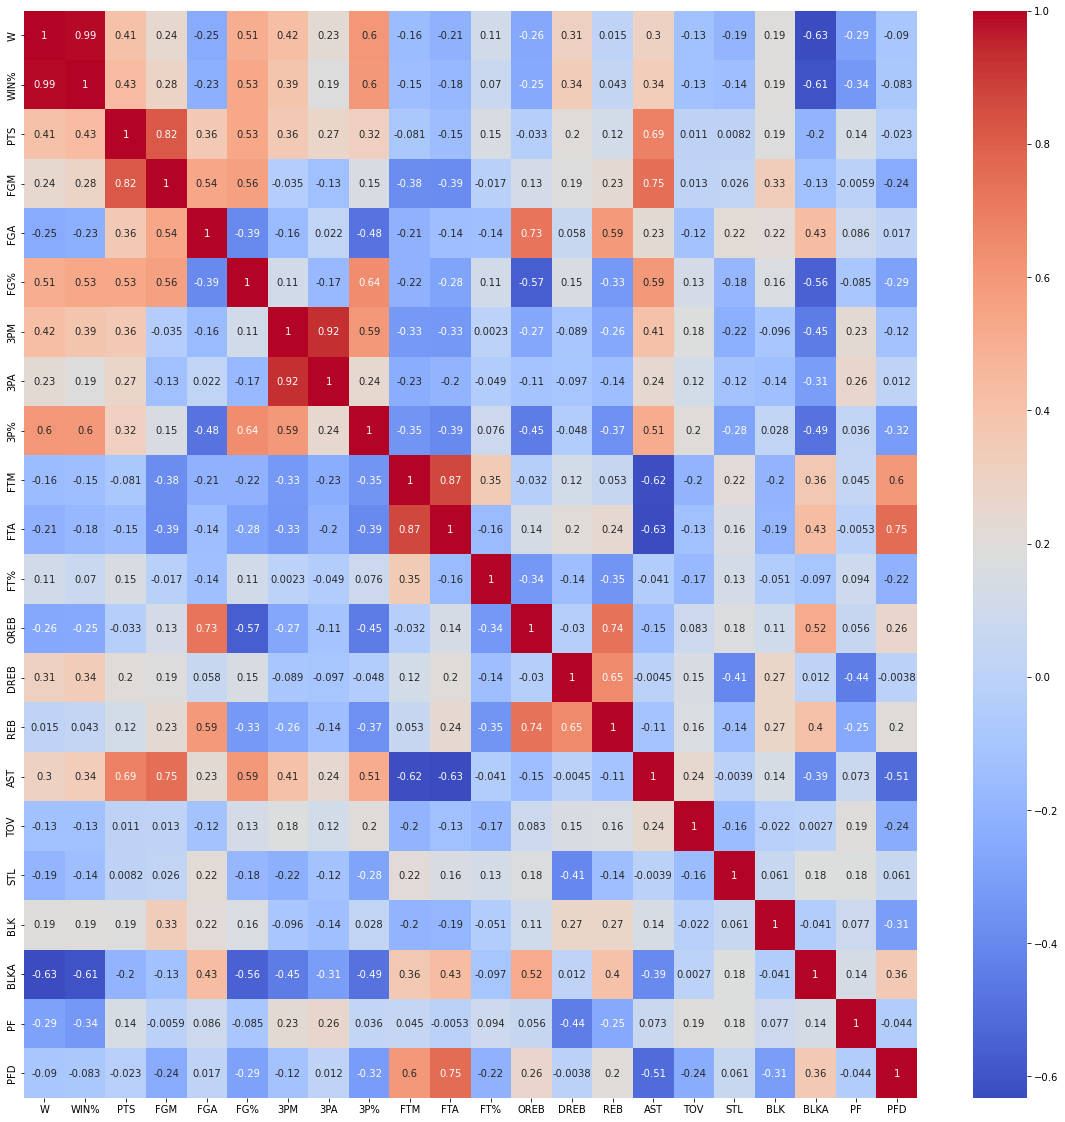

In [203]:
corr = statsOnly.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='coolwarm',ax=ax)
plt.show

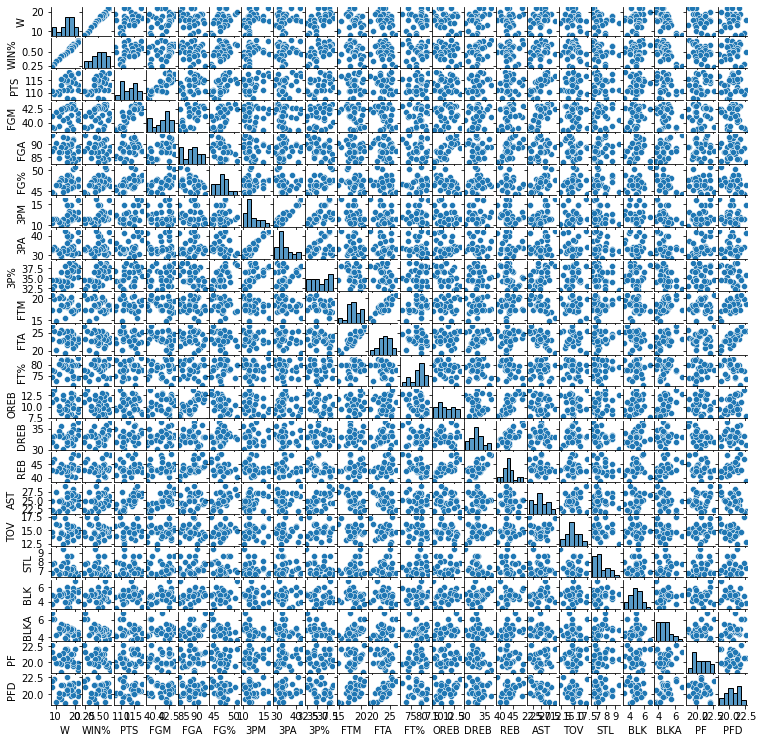

In [204]:
sns.pairplot(statsOnly)
plt.gcf().set_size_inches(10, 10)
plt.show()

### check if the data is heavily skewed

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:223: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


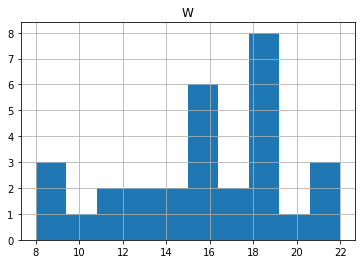

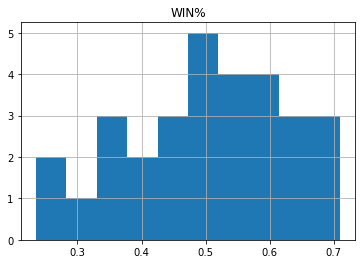

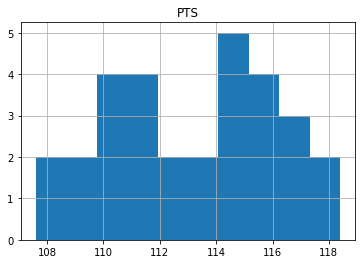

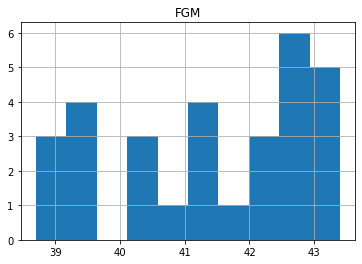

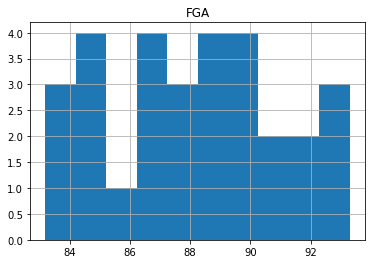

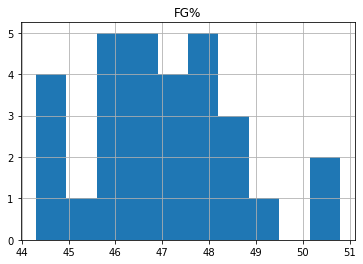

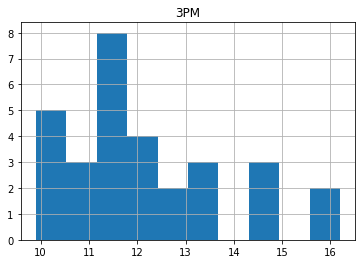

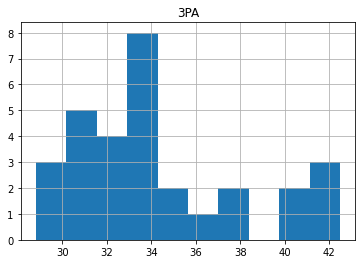

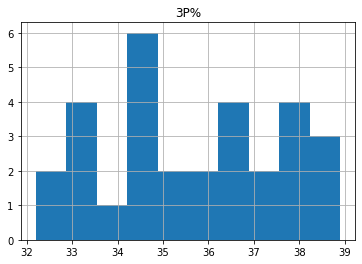

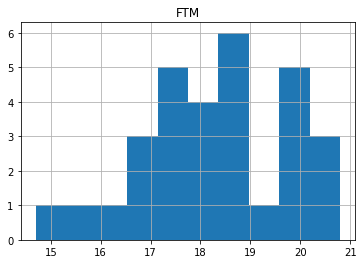

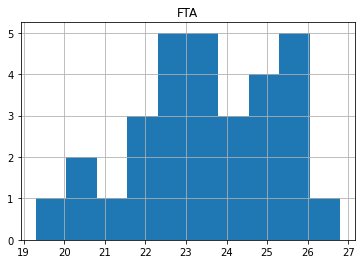

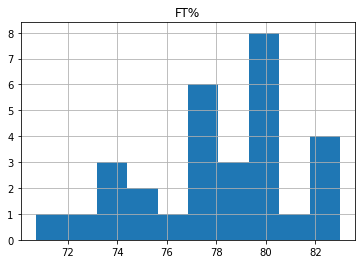

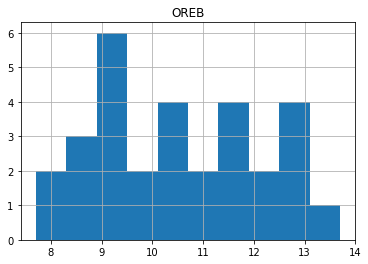

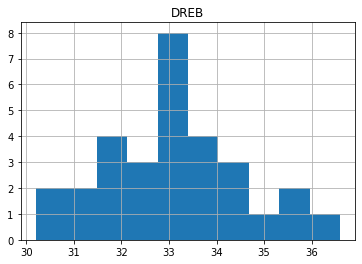

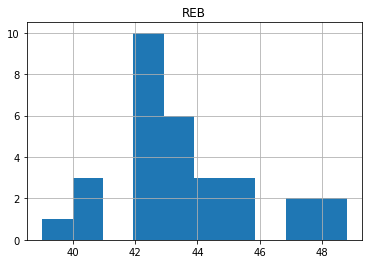

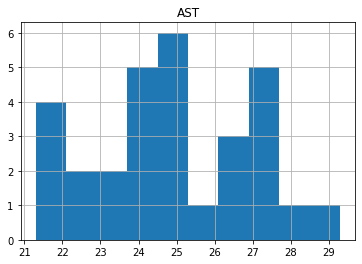

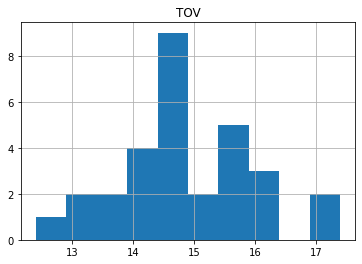

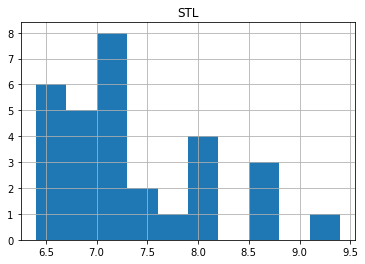

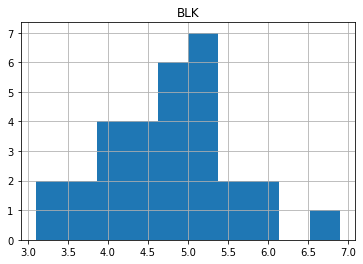

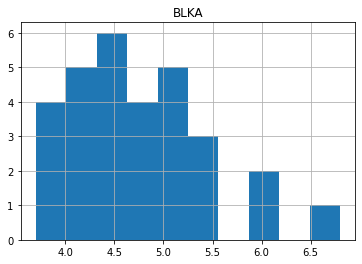

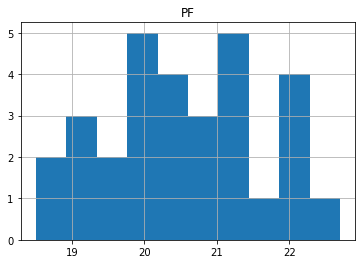

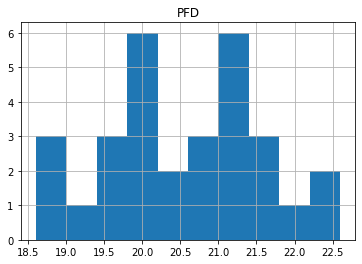

In [205]:
for col in statsOnly.columns:      
    statsOnly[col] = pd.to_numeric(df[col]) 
    statsOnly.hist(column=col)     

In [206]:
statsOnly.skew()

W      -0.453002
WIN%   -0.448651
PTS    -0.062172
FGM    -0.434756
FGA    -0.016603
FG%     0.407926
3PM     0.958978
3PA     0.930376
3P%    -0.014289
FTM    -0.386082
FTA    -0.332481
FT%    -0.512772
OREB    0.132787
DREB    0.363725
REB     0.549093
AST     0.118740
TOV     0.196858
STL     1.010687
BLK     0.148559
BLKA    0.871181
PF      0.105513
PFD    -0.059469
dtype: float64

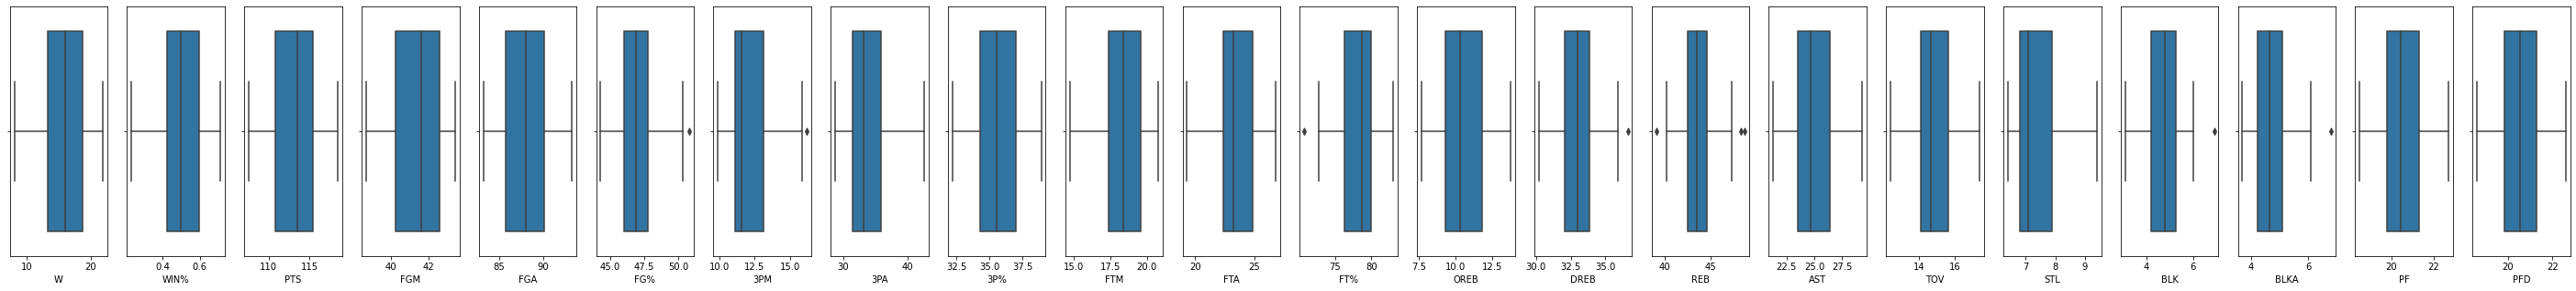

In [207]:
fig, axs = plt.subplots(1, len(statsOnly.columns), figsize=(50, 5))
for i, col in enumerate(statsOnly.columns):
    sns.boxplot(data=statsOnly, x=col, ax=axs[i])
    

In [208]:
# we use the transform to log transform the data and normalize it to the neaerest 0 as possible

# winp = statsOnly['WIN%']
# stats_f = statsOnly.drop('WIN%',axis=1) # drop the win% no need to log transform
# stats_flog = stats_f.transform(np.log) # log transform all the data except win%
# stats_flog.insert(0,'WIN%',winp,True) # put back the win% to the feature dataframe
# stats_flog

# Commented since this just made the model perform worst

In [209]:
statsOnly # comparison to the data above

,W,WIN%,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD
0,22,0.710,112.9,41.1,89.1,46.2,13.2,37.3,35.3,17.5,...,11.7,36.6,48.4,24.9,15.2,6.5,5.7,4.6,18.7,19.7
1,22,0.688,118.0,41.8,87.6,47.7,15.9,41.9,37.9,18.5,...,8.9,34.6,43.6,26.3,13.9,6.6,5.3,3.8,19.8,20.5
2,22,0.667,111.0,40.5,84.4,48.0,11.5,31.2,36.8,18.5,...,9.4,33.5,42.9,23.4,14.6,6.4,4.1,4.4,19.2,21.6
3,19,0.633,115.4,43.4,86.3,50.3,11.6,30.1,38.7,16.9,...,10.4,33.0,43.4,28.2,15.4,7.1,4.5,4.6,19.3,21.0
4,19,0.633,115.4,43.0,92.1,46.7,11.9,33.8,35.2,17.4,...,12.9,35.9,48.8,25.0,14.6,7.4,5.9,5.0,19.7,21.7
5,20,0.625,114.0,42.5,83.6,50.8,11.9,31.2,38.3,17.1,...,7.7,32.5,40.2,26.4,14.8,6.9,6.9,3.7,22.1,18.8
6,18,0.600,117.3,43.4,89.4,48.5,11.2,30.6,36.7,19.4,...,11.5,33.4,44.9,27.0,15.0,8.7,4.3,5.1,20.2,20.5
7,18,0.600,111.2,39.5,83.6,47.3,12.6,33.1,38.2,19.6,...,8.3,32.5,40.7,24.2,14.7,8.7,4.6,4.8,20.5,19.7
8,19,0.594,115.7,43.0,91.4,47.1,13.2,34.7,37.9,16.5,...,12.3,31.2,43.5,27.0,13.2,7.2,5.3,4.2,21.2,20.2
9,19,0.576,107.6,39.0,84.8,46.0,12.3,33.2,36.9,17.4,...,9.8,34.8,44.6,22.6,15.8,6.4,4.7,4.3,20.0,19.8


## Performing Multiple Regression

In [256]:
# y = stats_flog['WIN%']
# x = stats_flog[['PTS','FGM','FGA','FG%','3PM','3PA','3P%','FTM','FTA','FT%','OREB','DREB','REB','AST','TOV','STL','BLK','BLKA','PF','PFD']]

y = statsOnly['WIN%']
x = statsOnly[['W','PTS','FG%','3P%','FT%','REB','AST','STL','BLKA','PF']]

In [257]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=5)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((21, 10), (9, 10), (21,), (9,))

<AxesSubplot:title={'center':'Win Percentage vs. WIN'}, xlabel='W', ylabel='WIN%'>

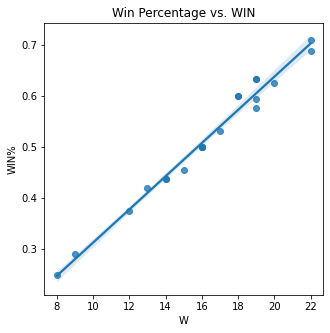

In [258]:
#Visualize the relationship

#Figure size
plt.figure(figsize = (5,5))

#Labels
plt.xlabel('Win Percentage')
plt.ylabel('WIN')
plt.title('Win Percentage vs. WIN')

sns.regplot(x=x_train['W'], y = y_train)

<AxesSubplot:ylabel='Frequency'>

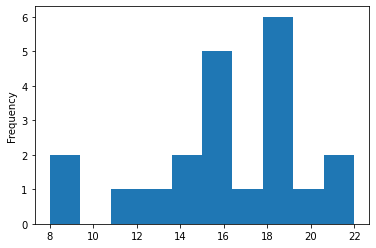

In [259]:
x_train['W'].plot.hist()

## Performing standard scaler

In [260]:
# scaling the number down so it gets more closer to 0, hence we see a pattern in the data

scaler = StandardScaler()
scaler.fit(x_train)

x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

x_train_sdf = pd.DataFrame(x_train_s, columns = x_train.columns, index = x_train.index)
x_test_sdf = pd.DataFrame(x_test_s, columns = x_test.columns, index = x_test.index)


In [261]:
x_train_sdf # if we compare this to the previous data, this data is far more close to 0

,W,PTS,FG%,3P%,FT%,REB,AST,STL,BLKA,PF
21,-0.627894,-0.643365,-1.208569,-1.788909,0.330542,-0.364546,-1.170682,2.458485,0.025527,-0.034983
28,-2.276115,-0.852293,-1.569421,-1.741295,-1.087273,0.870207,-0.175365,0.423877,2.705856,1.224388
0,1.569734,-0.051403,-0.426722,-0.312889,-1.234962,1.981485,-0.026068,-1.229242,-0.242506,-1.819091
17,-0.078487,-1.757648,-1.028143,-0.789024,1.187139,-1.105398,-0.573492,0.678203,-0.912588,-1.189405
5,1.020327,0.331632,2.339812,1.115517,0.537307,-1.393507,0.720420,-0.720590,-1.448654,1.749126
1,1.569734,1.724485,0.475409,0.925063,1.452980,0.005880,0.670654,-1.102079,-1.314638,-0.664668
27,-2.001411,-1.235328,-1.569421,-1.408000,-0.230676,1.364108,-1.817638,0.551040,1.767741,0.174913
12,0.196217,-0.329973,0.475409,1.401198,-0.201139,-0.282229,-0.374429,-1.102079,-0.242506,-0.139930
20,-0.627894,0.714666,-0.547006,-0.789024,0.478231,0.376306,-0.374429,0.551040,0.829626,1.014493
19,-0.353190,1.202165,0.535551,0.972677,0.507769,-0.446863,2.163629,-0.847753,-1.180621,1.644178


## perfroming the Linear Regression

In [262]:
linreg = LinearRegression()


linreg.fit(x_train_sdf,y_train)

LinearRegression()

In [263]:
linreg.coef_

array([ 0.11777761,  0.00154895,  0.0067804 ,  0.00499574, -0.00481447,
        0.00244366,  0.00038504,  0.0110291 ,  0.00722827, -0.00742444])

In [264]:
linreg.intercept_

0.5169047619047619

In [265]:
xf =['W','PTS','FG%','3P%','FT%','REB','AST','STL','BLKA','PF']

for i in range(len(xf)):
    print(f"{xf[i]}:{linreg.coef_[i]}")
    

W:0.11777760626632865
PTS:0.001548952845013662
FG%:0.006780402462779844
3P%:0.0049957363409640545
FT%:-0.004814468843193519
REB:0.00244366243876809
AST:0.0003850439014223507
STL:0.011029104494604825
BLKA:0.007228271254864199
PF:-0.007424443871386247


In [266]:
y_pred = linreg.predict(x_test_sdf)
y_pred[0]

0.5499331176419137

In [267]:
print("r2: "+str(r2_score(y_test, y_pred)))
print("mae: "+str(mean_absolute_error(y_test, y_pred))) 
print("rmse: "+str(np.sqrt(mean_squared_error(y_test, y_pred))))

r2: 0.9683955707632177
mae: 0.01963020245130182
rmse: 0.022856296513130186


In [268]:
df_results = pd.DataFrame(y_test.values, columns=['Actual'], index=y_test.index)
df_results['Predicted'] = y_pred
df_results.head()

,Actual,Predicted
11,0.563,0.549933
29,0.235,0.220110
23,0.419,0.414479
25,0.364,0.352896
18,0.500,0.507750


In [269]:
x_test.join(df_results)

,W,PTS,FG%,3P%,FT%,REB,AST,STL,BLKA,PF,Actual,Predicted
11,18,114.4,45.8,33.4,79.4,47.3,23.2,7.0,4.7,21.3,0.563,0.549933
29,8,110.8,44.9,34.6,77.5,42.9,21.9,6.7,6.1,22.7,0.235,0.220110
23,13,115.3,47.6,33.1,79.8,44.9,24.6,6.8,5.0,18.5,0.419,0.414479
25,12,109.6,46.6,34.3,80.4,43.5,21.6,6.6,5.1,21.1,0.364,0.352896
18,16,114.9,49.0,34.2,77.9,42.5,25.9,8.7,3.7,21.9,0.500,0.507750
10,17,118.4,48.8,35.7,77.7,42.2,27.0,7.0,4.5,21.0,0.567,0.535858
2,22,111.0,48.0,36.8,80.0,42.9,23.4,6.4,4.4,19.2,0.667,0.694375
13,18,116.9,47.4,37.0,77.1,43.5,26.4,7.2,4.9,21.3,0.529,0.571174
26,10,110.3,46.5,34.6,72.7,42.5,27.4,7.1,4.2,19.8,0.333,0.308351


Text(0.5, 1.0, 'Actual Spend vs Predicted Spend')

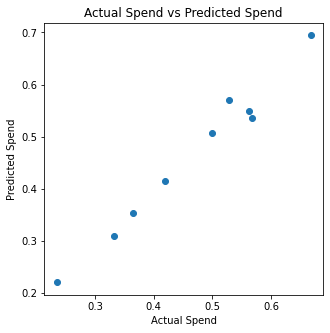

In [270]:
#Visualize the results

#Figure Size
f, ax = plt.subplots(figsize=(5, 5))

#Function for Scatter Plot
plt.scatter(y_test, y_pred)

#Labels
plt.xlabel("Actual Spend")
plt.ylabel("Predicted Spend")
plt.title("Actual Spend vs Predicted Spend")

### Final notes

the previous model failed, due to some features 
the first data was 
**[['PTS','FGM','FGA','FG%','3PM','3PA','3P%','FTM','FTA','FT%','OREB','DREB','REB','AST','TOV','STL','BLK','BLKA','PF','PFD']]**

but we ended up using 

**['W','PTS','FG%','3P%','FT%','REB','AST','STL','BLKA','PF']**  

the Win stats create a big impact to the prediction
having **0.989262** correlated to the  win percentage

the r^2 is **0.968** which means there's a higher probability that the model were able to predict the win Percentage due to the given features.